<a href="https://colab.research.google.com/github/yvuuus/ALGO-SDL-PROJECT/blob/main/signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ahmetozlu/signature_extractor.git
%cd signature_extractor

Cloning into 'signature_extractor'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 177 (delta 17), reused 19 (delta 9), pack-reused 147 (from 1)
Receiving objects: 100% (177/177), 3.99 MiB | 8.37 MiB/s, done.
Resolving deltas: 100% (91/91), done.
/content/signature_extractor


In [ ]:
!pip install opencv-python numpy matplotlib

In [ ]:
!python signature_extractor.py


[./inputs/in1.jpg]
Biggest component: 1859.0
Average area: 132.96067415730337
Small object threshold: 495.71629213483146
Big object threshold: 8922.893258426966
Saved: ./outputs/output_in1.png

[./inputs/in2.jpg]
Biggest component: 1811.0
Average area: 76.51369863013699
Small object threshold: 327.719341161122
Big object threshold: 5898.9481409001955
Saved: ./outputs/output_in2.png


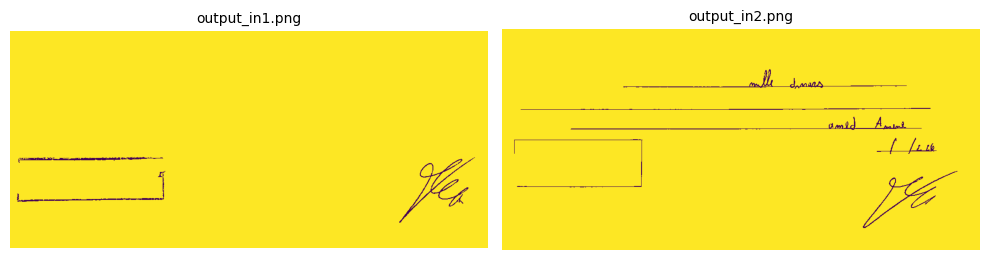

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# List of output image filenames
output_files = [
    '/content/signature_extractor/outputs/output_in1.png',
    '/content/signature_extractor/outputs/output_in2.png'
]

# Load images
images = [Image.open(path) for path in output_files]

# Plot images side by side
fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
if len(images) == 1:
    axes = [axes]
for ax, img, fname in zip(axes, images, output_files):
    ax.imshow(img)
    ax.set_title(fname.split('/')[-1], fontsize=10)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image

# List of input/output file pairs
image_pairs = [
    ('/content/signature_extractor/outputs/output_in1.png', 'cropped_output_in1.png'),
    ('/content/signature_extractor/outputs/output_in2.png', 'cropped_output_in2.png')
]

# Crop dimensions
crop_width = 300
crop_height = 200

for input_path, output_path in image_pairs:
    # Load the image
    img = Image.open(input_path)

    # Get image size
    width, height = img.size

    # Calculate crop box: (left, upper, right, lower)
    left = max(width - crop_width, 0)
    upper = max(height - crop_height, 0)
    right = width
    lower = height

    # Crop the image
    cropped_img = img.crop((left, upper, right, lower))

    # Save and (optionally) display the cropped image
    cropped_img.save(output_path)
    cropped_img.show()

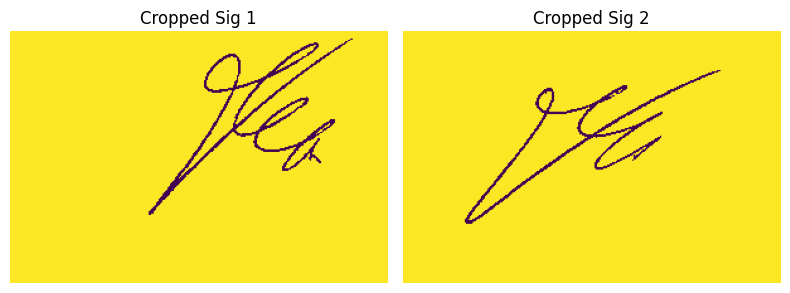

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# List of cropped image file paths
cropped_files = [
    'cropped_output_in1.png',
    'cropped_output_in2.png'
]

# Load images
images = [Image.open(path) for path in cropped_files]

# Plot images side by side
fig, axes = plt.subplots(1, len(images), figsize=(8, 4))
if len(images) == 1:
    axes = [axes]
for ax, img, title in zip(axes, images, ['Cropped Sig 1', 'Cropped Sig 2']):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torch import nn
from torchvision import models

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.backbone = models.resnet18(pretrained=True)
        self.backbone.fc = nn.Identity()  # Remove classification head

    def forward_once(self, x):
        return self.backbone(x)

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

# Load model
model = SiameseNetwork()
model.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def load_image(img_path):
    img = Image.open(img_path).convert('RGB')
    return transform(img).unsqueeze(0)

# Load images
img1 = load_image('/content/signature_extractor/cropped_output_in1.png')
img2 = load_image('/content/signature_extractor/cropped_output_in2.png')

# Compute feature vectors
with torch.no_grad():
    feat1, feat2 = model(img1, img2)

# Compute Euclidean distance
distance = torch.norm(feat1 - feat2, p=2).item()
print(f"Feature distance: {distance:.4f}")
if distance < 1.0:
    print("Images are likely the same (no forgery detected).")
else:
    print("Images are likely different (possible forgery or manipulation).")

Feature distance: 8.4779
Images are likely different (possible forgery or manipulation).
